### Mopsy and Mocha ####

#### Introduction ###
Here in this machine learning project, we will be using the concept of convolutional linear regression, where we will be interaction a set of images, some with a dog and others with a cat. The data set has already been divided into a testing and training set, where we will begin to train a model to identify cats, dogs, and the differences between them.


Below is some code that allows for the importing of all images as a Numpy array, for which the skimage library was used. First, all related libraries were imported.

In [1]:
import sys, os
import skimage.io, skimage.color
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

This function returns the shape of an image, given a folder path and a filename. This is returned as a Numpy array.

In [2]:
def get_image_resolution(folder, file):
    full_path = os.path.join(folder, file)
    img_data = skimage.io.imread(full_path)
    bw_data = skimage.color.rgb2gray(img_data)
    return bw_data.shape

As a proof of concept to show that pictures could be read, all training dog pictures were opened into a Numpy array, where the `get_image_resolution()` function extracted the shape as long as the image is opened. Only one folder is needed for this proof of concept.

In [24]:
# First, we need to get every single file.
training_dog_folder = "training_set/dogs"
test_dog_folder = "test_set/dogs"
training_cat_folder = "training_set/cats"
test_cat_folder = "test_set/cats"

training_dog_paths = os.listdir(training_dog_folder)
training_dog_resolutions = [get_image_resolution(training_dog_folder, i) for i in training_dog_paths]

print(training_dog_resolutions)

[(499, 370), (499, 286), (160, 237), (215, 166), (500, 269), (500, 409), (304, 495), (240, 319), (233, 350), (254, 385), (375, 499), (359, 480), (499, 267), (374, 500), (500, 415), (375, 499), (374, 500), (280, 324), (358, 419), (375, 499), (497, 500), (399, 336), (374, 500), (379, 500), (431, 336), (500, 332), (269, 360), (500, 272), (325, 424), (500, 433), (340, 457), (500, 496), (171, 299), (122, 160), (375, 499), (375, 499), (500, 298), (418, 500), (300, 226), (447, 350), (261, 350), (374, 500), (398, 500), (395, 375), (374, 500), (485, 480), (374, 500), (374, 500), (500, 491), (422, 449), (374, 500), (288, 359), (332, 500), (418, 411), (239, 320), (375, 499), (251, 250), (392, 499), (375, 499), (187, 138), (380, 500), (500, 335), (418, 499), (500, 426), (374, 500), (387, 480), (309, 296), (251, 350), (374, 500), (210, 359), (361, 387), (479, 455), (499, 375), (337, 499), (276, 349), (154, 300), (499, 420), (265, 500), (269, 360), (499, 397), (458, 499), (500, 352), (374, 500), (32

With these resolutions, next week, the resolutions will be filtered using a histogram, so comparisons can only be made between similarly sized pictures. Since reading these resolutions requires getting the shape of each Numpy array of pixels, it indicates that every image file in a folder of pictures was opened.

Our progress is available at https://github.com/andy64734/all-might.

In [55]:
"""
Generates a Pandas DataFrame, corresponding all the paths and resolutions
into appropriate columns.
"""
def generate_df(folder, files, reses):
    horiz = [i[0] for i in reses]
    vert = [i[1] for i in reses]
    
    paths = [os.path.join(folder, i) for i in files]
    
    df = pd.DataFrame({'path': paths, 'horiz': horiz, 'vert': vert })    
    return df

In [56]:
training_dog_df = generate_df(training_dog_folder, training_dog_paths, training_dog_resolutions)
print(training_dog_df)

                                path  horiz  vert
0      training_set/dogs/dog.697.jpg    499   370
1     training_set/dogs/dog.1950.jpg    499   286
2     training_set/dogs/dog.2963.jpg    160   237
3     training_set/dogs/dog.2606.jpg    215   166
4     training_set/dogs/dog.3641.jpg    500   269
5     training_set/dogs/dog.3875.jpg    500   409
6     training_set/dogs/dog.2414.jpg    304   495
7     training_set/dogs/dog.2482.jpg    240   319
8     training_set/dogs/dog.2289.jpg    233   350
9      training_set/dogs/dog.669.jpg    254   385
10    training_set/dogs/dog.3224.jpg    375   499
11    training_set/dogs/dog.3861.jpg    359   480
12     training_set/dogs/dog.970.jpg    499   267
13    training_set/dogs/dog.2649.jpg    374   500
14    training_set/dogs/dog.2337.jpg    500   415
15    training_set/dogs/dog.2173.jpg    375   499
16    training_set/dogs/dog.3870.jpg    374   500
17    training_set/dogs/dog.3915.jpg    280   324
18    training_set/dogs/dog.3881.jpg    358   419


In [48]:
training_dog_reses_series = pd.Series(training_dog_resolutions)
print(training_dog_reses_series.mode())

0    (374, 500)
dtype: object


{'figure.facecolor': 'white',
 'text.color': '.15',
 'axes.labelcolor': '.15',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.linestyle': '-',
 'lines.solid_capstyle': 'round',
 'axes.grid': True,
 'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'axes.linewidth': 0,
 'grid.color': 'white',
 'xtick.major.size': 0,
 'ytick.major.size': 0,
 'xtick.minor.size': 0,
 'ytick.minor.size': 0}

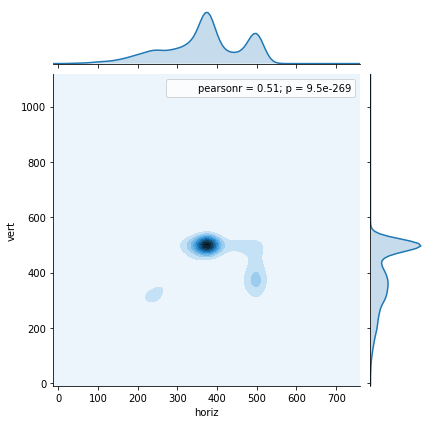

In [30]:
sns.jointplot(training_dog_df['horiz'], training_dog_df['vert'], kind="kde")
sns.axes_style("darkgrid")

In [ ]:
def get_most_common_res(reses):
    reses_series = pd.Series(reses)
    return reses_series.mode()[0]

In [32]:
def filter_df_by_res(df, horiz, vert):
    df = df[df['horiz'] == horiz]
    df = df[df['vert'] == vert]
    return df

In [63]:
training_dog_res_mask = get_most_common_res(training_dog_resolutions)
training_dog_df = filter_df_by_res(training_dog_df, 
                                   training_dog_res_mask[0], 
                                   training_dog_res_mask[1])

In [68]:
print(training_dog_df.shape)
training_dog_df

(450, 3)


,path,horiz,vert
13,training_set/dogs/dog.2649.jpg,374,500
16,training_set/dogs/dog.3870.jpg,374,500
22,training_set/dogs/dog.2378.jpg,374,500
41,training_set/dogs/dog.3243.jpg,374,500
44,training_set/dogs/dog.1251.jpg,374,500
46,training_set/dogs/dog.399.jpg,374,500
47,training_set/dogs/dog.1714.jpg,374,500
50,training_set/dogs/dog.1094.jpg,374,500
64,training_set/dogs/dog.526.jpg,374,500
68,training_set/dogs/dog.1959.jpg,374,500


In [65]:
def generate_optimal_df(folder):
    paths = os.listdir(folder)
    reses = [get_image_resolution(folder, i) for i in paths]
    df = generate_df(folder, paths, reses)
    opt_res = get_most_common_res(reses)
    print("Optimal resolution for " + folder + " is " + str(opt_res))
    
    HORIZ_INDEX = 0
    VERT_INDEX = 1
    
    df = df[df['horiz'] == opt_res[HORIZ_INDEX]][df['vert'] == opt_res[VERT_INDEX]]
    return df

In [67]:
test_dog_df = generate_optimal_df(test_dog_folder)
test_dog_df

Optimal resolution for test_set/dogs is (374, 500)


/home/andy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


,path,horiz,vert
1,test_set/dogs/dog.4629.jpg,374,500
7,test_set/dogs/dog.4341.jpg,374,500
13,test_set/dogs/dog.4019.jpg,374,500
37,test_set/dogs/dog.4233.jpg,374,500
47,test_set/dogs/dog.4502.jpg,374,500
53,test_set/dogs/dog.4804.jpg,374,500
59,test_set/dogs/dog.4494.jpg,374,500
72,test_set/dogs/dog.4923.jpg,374,500
81,test_set/dogs/dog.4731.jpg,374,500
103,test_set/dogs/dog.4519.jpg,374,500


In [18]:
test_dog_df.shape

(108, 3)

In [19]:
for file in training_dog_df['path']:
    img = skimage.io.imread(os.path.join(training_dog_folder, file), as_gray = True)
    img_squished = img.flatten()

In [44]:
training_cat_df = generate_optimal_df(training_cat_folder)
training_cat_df.shape

Optimal resolution for training_set/cats is (375, 499)


/home/andy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


(506, 3)

In [70]:
test_cat_df = generate_optimal_df(test_cat_folder)
test_cat_df.shape

Optimal resolution for test_set/cats is (374, 500)


/home/andy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


(137, 3)

In [73]:
paths = os.listdir(training_cat_folder)
reses = [get_image_resolution(training_cat_folder, i) for i in paths]
df = generate_df(training_cat_folder, paths, reses)
opt_res = (374, 500)
print("Optimal resolution for " + training_cat_folder + " is " + str(opt_res))

HORIZ_INDEX = 0
VERT_INDEX = 1

df = df[df['horiz'] == opt_res[HORIZ_INDEX]][df['vert'] == opt_res[VERT_INDEX]]
df

Optimal resolution for training_set/cats is (374, 500)


/home/andy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


,path,horiz,vert
5,training_set/cats/cat.1990.jpg,374,500
42,training_set/cats/cat.237.jpg,374,500
43,training_set/cats/cat.1254.jpg,374,500
44,training_set/cats/cat.585.jpg,374,500
50,training_set/cats/cat.2801.jpg,374,500
51,training_set/cats/cat.659.jpg,374,500
59,training_set/cats/cat.1988.jpg,374,500
64,training_set/cats/cat.1599.jpg,374,500
70,training_set/cats/cat.1380.jpg,374,500
77,training_set/cats/cat.281.jpg,374,500
